<a href="https://colab.research.google.com/github/OweT1/personal/blob/main/Sentence_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in of packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!ls /content/drive/MyDrive/'Colab Datasets'/'Sentence Sentimental Analysis'

Mounted at /content/drive
dataset.csv


# Reading in of Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Sentence Sentimental Analysis/dataset.csv", header = None, names = ["Label", "Text"])

print(data.head()) # First column: 1 - positive, 0 - negative
print(data.shape)

   Label                                               Text
0      1  the rock is destined to be the 21st century's ...
1      1  the gorgeously elaborate continuation of " the...
2      1                     effective but too-tepid biopic
3      1  if you sometimes like to go to the movies to h...
4      1  emerges as something rare , an issue movie tha...
(10662, 2)


In [ ]:
print(data.columns)
print(type(list(data["Text"])))

Index(['Label', 'Text'], dtype='object')
<class 'list'>


# Model (Pre-built on Hugging Face)
For a start, we will try a pre-built model on Hugging Face that will analyse the text and give us a rating on whether it is `POSITIVE` or `NEGATIVE`.

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english", device = 0)
output = sentiment_pipeline(list(data["Text"]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
new_data = data
new_data["Prediction"] = pd.Series(map(lambda x: x['label'], output))

label_mapping = {"POSITIVE": 1, "NEGATIVE": 0}
new_data["Prediction"] = new_data["Prediction"].map(label_mapping)

In [ ]:
print(new_data.head())

print("Accuracy Score: " + str(accuracy_score(new_data["Label"], new_data["Prediction"])))

   Label                                               Text  Prediction
0      1  the rock is destined to be the 21st century's ...           1
1      1  the gorgeously elaborate continuation of " the...           1
2      1                     effective but too-tepid biopic           0
3      1  if you sometimes like to go to the movies to h...           1
4      1  emerges as something rare , an issue movie tha...           1
Accuracy Score: 0.8911086100168824


## Model Evaluation
We will evaluate the model and look at the accuracy of the model. As we can see, the model has an accuracy of around 89%.

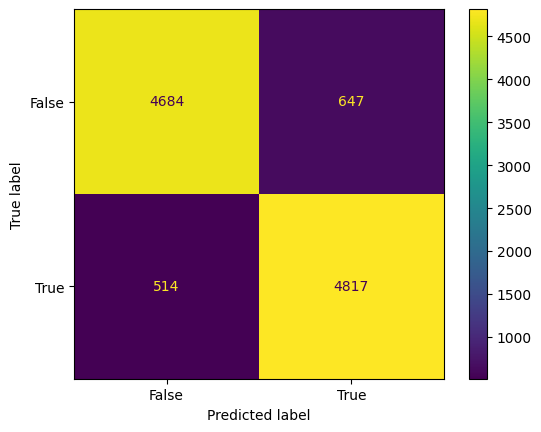

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5331
           1       0.88      0.90      0.89      5331

    accuracy                           0.89     10662
   macro avg       0.89      0.89      0.89     10662
weighted avg       0.89      0.89      0.89     10662



In [ ]:
confusion_matrix = confusion_matrix(new_data["Label"], new_data["Prediction"])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

print(classification_report(data["Label"], data["Prediction"]))

# Model (Manual)
Now, we will try to create a model on our own, and see if we can do better than the pre-built one on Hugging Face.

In [ ]:
X = data["Text"]
y = data["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

print(X_train.shape, X_test.shape)

(8529,) (2133,)
